(METDESCMASPRONUN)=

# 6.1 Método de descenso más pronunciado para *Unconstrained Convex Optimization* (UCO)

```{admonition} Notas para contenedor de docker:

Comando de docker para ejecución de la nota de forma local:

nota: cambiar `<ruta a mi directorio>` por la ruta de directorio que se desea mapear a `/datos` dentro del contenedor de docker y `<versión imagen de docker>` por la versión más actualizada que se presenta en la documentación.

`docker run --rm -v <ruta a mi directorio>:/datos --name jupyterlab_optimizacion -p 8888:8888 -d palmoreck/jupyterlab_optimizacion_2:<versión imagen de docker>`

password para jupyterlab: `qwerty`

Detener el contenedor de docker:

`docker stop jupyterlab_optimizacion_2`

Documentación de la imagen de docker `palmoreck/jupyterlab_optimizacion_2:<versión imagen de docker>` en [liga](https://github.com/palmoreck/dockerfiles/tree/master/jupyterlab/optimizacion_2).

```

---

Nota generada a partir de [liga1](https://drive.google.com/file/d/16-_PvWNaO0Zc9x04-SRsxCRdn5fxebf2/view)

```{admonition} Al final de esta nota la comunidad lectora:
:class: tip

*

```

En esta nota se consideran problemas de optimización convexa sin restricciones, *Unconstrained Convex Optimization* (UCO):

$$\min f_o(x)$$

con $f_o:\mathbb{R}^n \rightarrow \mathbb{R}$ función objetivo fuertemente convexa y $f_o \in \mathcal{C}^2(\text{dom}f_o)$.

Se asume que los puntos iniciales $x^{(0)}$ de los métodos iterativos están en $\text{dom}f_o$ y los conjuntos $f_o(x^{(0)})$-subnivel son conjuntos cerrados. También se asume que existe un punto óptimo $x^*$ por lo que el problema tiene solución y el valor óptimo se denota por $p^* = f_o(x^*) = \inf f_o(x)$

```{admonition} Comentario

Las suposición que una función $f$ sea convexa asegura que una **condición necesaria y suficiente** para que $x^*$ sea óptimo es: $\nabla f(x^*) = 0$ la cual es **en general** es un conjunto de $n$ **ecuaciones no lineales** en $n$ variables y que resuelve el problema de optimización planteado al inicio. Ver {ref}`resultados útiles <RESUT>`. 

```

El método de *steepest descent* o descenso más pronunciado sigue los pasos del algoritmo ya revisado en {ref}`método general de descenso para problemas UCO <METGENDESCPARAUCO>` que a continuación nuevamente se describe.

## Algoritmo: método general de descenso para problemas UCO

```{margin}

Los pasos de un algoritmo representan una guía para la implementación, no implica que se tengan que implementar uno a continuación del otro como se describe. Si una implementación respeta la lógica y al mismo algoritmo, entonces pueden seguirse los pasos de una forma distinta.
```

> **Dado** un **punto inicial** $x$ en $\text{dom}f_o$
>
> **Repetir** el siguiente bloque para $k=0,1,2, \dots$
>>
>> 1. Determinar una dirección de descenso $\Delta x$.
>> 2. Búsqueda de línea. Elegir un tamaño de paso $t > 0$.
>> 3. Hacer la actualización: $x = x + t\Delta x$.
>
> **hasta** convergencia (satisfacer criterio de paro).


## Perspectiva del método de descenso más pronunciado 

Calcular una dirección $\Delta x_{\text{nsd}}$ que satisfaga: 

$$\Delta x_{\text{nsd}} = \text{argmin} \{ \nabla f_o(x)^Tv : ||v|| \leq 1, \nabla f_o(x)^Tv < 0 \}$$ 

donde: $||\cdot||$ es alguna norma en $\mathbb{R}^n$. 

```{admonition} Comentario

El subíndice "nsd" se refiere a *normalized steepest descent*.

```

Posteriormente con $\Delta x_{\text{nsd}}$ se define el paso $\Delta x_{\text{sd}}=||\nabla f_o(x)||_* \Delta x_{\text{nsd}}$ donde: $|| \cdot||_*$ es la **norma dual**. 

```{admonition} Definición

La norma dual asociada a $||\cdot||$ se denota como $||\cdot||_*$ y se define como: 

$$||z||_* = \sup \{z^Tx :||x||= 1\}.$$ 

```

```{admonition} Comentarios

* Se puede probar que: 

    * $||z||_{2*}$ (la norma dual de la norma $2$) es $||z||_2$ y $||z||_{1*}$ (la norma dual de la norma $1$) es $||z||_\infty$ $\forall z \in \mathbb{R}^n$.

    * $\Delta x_{\text{sd}}$ es dirección de descenso.

* En la definición de $\Delta x_{\text{nsd}}$ anterior:

    * Si $||\cdot||$ es la norma $2$: $\Delta x_{\text{nsd}} = \text{argmin} \{ \nabla f_o(x)^Tv : ||v||_2 \leq 1, \nabla f_o(x)^Tv < 0 \} $ entonces 
    
    $$\Delta x_{\text{sd}} = - \nabla f_o(x).$$
    
    Lo cual prueba que el método de descenso más pronunciado generaliza al método de descenso en gradiente.

    * Si $||\cdot||$ es una norma cuadrática con matriz $P \in \mathbb{S}^n_{++}$: $\Delta x_{\text{nsd}} = \text{argmin} \{ \nabla f_o(x)^Tv : ||v||_P \leq 1, \nabla f_o(x)^Tv < 0 \} $ entonces 
    
    $$\Delta x_{\text{sd}} = - P^{-1} \nabla f_o(x).$$
    
    Si $P$ es la Hessiana de $f_o$, $P=\nabla ^2 f_o(x)$ tenemos el método de Newton por lo que es un caso particular del método de descenso más pronunciado. Si $P=I$ tenemos el método de descenso en gradiente (punto anterior).

    * Si $||\cdot||$ es la norma $1$: $\Delta x_{\text{nsd}} = \text{argmin} \{ \nabla f_o(x)^Tv : ||v||_1 \leq 1, \nabla f_o(x)^Tv < 0 \} $ entonces 
    
    $$\Delta x_{\text{sd}} = - \frac{\partial f_o(x)}{\partial x_i} e_i$$
    
con $e_i$ $i$-ésimo vector canónico y el índice $i$ es la entrada del vector $\nabla f_o(x)$ de máxima magnitud: $i$ tal que $\left |(\nabla f_o(x))_i \right | = ||\nabla f_o(x)||_\infty$. En este caso el método se nombra ***coordinate descent***, **descenso por coordenadas**. En cada iteración **una única** componente de $x$ es actualizada.
    
* **Interpretación:** $\Delta x_{\text{nsd}}$ es un paso tal que $||\Delta x_{\text{nsd}}|| = 1$ y da el **mayor decrecimiento en la aproximación lineal\* de $f_o$**. Geométricamente es la dirección en la bola unitaria (generada por $||\cdot||$) que se **extiende lo más lejos posible en la dirección $-\nabla f_o(x)$**.

\*Recuérdese que la aproximación lineal a una función $f_o$ está dada por Taylor a primer orden: $f_o(x+v)=\hat{f}_o(x+v) = f_o(x) + \nabla f_o(x)^Tv$.

* Para visualizar el paso $\Delta x_{\text{nsd}}$ se tiene el siguiente dibujo: 

**Con la norma cuadrática:**

<img src="https://dl.dropboxusercontent.com/s/91qivndznw2xfgb/steepest_descent_quadratic_norm.png?dl=0" heigth="750" width="750">

**Con la norma 1:**

<img src="https://dl.dropboxusercontent.com/s/qcbpuhvge9uqgim/steepest_desc_l1_norm.png?dl=0" heigth="750" width="750">

En los dibujos $f = f_o$.

```

## Ejemplos de los métodos de descenso en gradiente y Newton 

### Algoritmo: Método de descenso en gradiente

```{margin}

Los pasos de un algoritmo representan una guía para la implementación, no implica que se tengan que implementar uno a continuación del otro como se describe. Si una implementación respeta la lógica y al mismo algoritmo, entonces pueden seguirse los pasos de una forma distinta.
```

> **Dado** un **punto inicial** $x$ en $\text{dom}f_o$
>
> **Repetir** el siguiente bloque para $k=0,1,2,...$
>>
>> 1. Calcular la dirección de descenso $\Delta x = - \nabla f_o(x)$.
>> 2. Búsqueda de línea. Elegir un tamaño de paso $t > 0$.
>> 3. Hacer la actualización: $x = x + t\Delta x$.
>
> **hasta** convergencia (satisfacer criterio de paro).


### Algoritmo: Método de Newton

> **Dado** un **punto inicial** $x$ en $\text{dom}f_o$
>
> **Repetir** el siguiente bloque para $k=0,1,2,\dots$
>
>> 1. Calcular la dirección de descenso de Newton $\Delta x_{\text{nt}} = - \nabla ^2 f_o(x)^{-1} \nabla f_o(x)$ y el decremento de Newton al cuadrado: $\lambda^2(x)=\nabla f_o(x)^T \nabla ^2 f_o(x)^{-1} \nabla f_o(x)$.
>> 2. Búsqueda de línea. Elegir un tamaño de paso $t > 0$ (usar el cálculo de $\lambda (x)$ del paso anterior).
>> 3. Hacer la actualización: $x = x + t\Delta x_{\text{nt}}$.
>
> **hasta** convergencia (satisfacer criterio de paro).


```{admonition} Definición

En el algoritmo anterior se utilizó $\lambda(x)$, ver {ref}`decremento de Newton <DECREMENTONEWTON>`.

```

In [1]:
import numpy as np
import sympy
import math
from sympy.tensor.array import derive_by_array
import matplotlib.pyplot as plt

from opt.classes.problems import ProblemFeasibleInitPoint
from opt.classes.functions import GradientObjectiveFunction, HessianObjectiveFunction

$$\min \quad (x_1-2)^2+(2-x_2)^2+x_3^2+x_4^4$$

In [2]:
type_problem = "UCO"
fo_numpy = lambda x: (x[0]-2)**2 + (2-x[1])**2 + x[2]**2 + x[3]**4
p = ProblemFeasibleInitPoint(type_problem,
                             fo_numpy)

In [3]:
if p.well_defined_problem:
    print("problema %s bien definido" % p.type_problem)
else:
    print("problema %s no bien definido" % p.type_problem)

problema UCO bien definido


In [4]:
def map_sympy_vars_to_array_values(x):
    """
    Args:
        x (numpy ndarray): 1d array of floats
    """
    n = x.size
    return {"x%s" % i: x[i-1] for i in range(1,n+1)}

In [5]:
x1, x2, x3, x4 = sympy.symbols("x1, x2, x3, x4")
x_sympy = (x1, x2, x3, x4)
fo_sympy = (x1 - 2)**2 + (2 - x2)**2 + x3**2 + x4**2
gf_sympy = derive_by_array(fo_sympy, x_sympy)
Hf_sympy = derive_by_array(gf_sympy, x_sympy)
n = len(x_sympy)

gf = lambda x: np.array([first_partial_derivative.subs(map_sympy_vars_to_array_values(x)) \
                         for first_partial_derivative in gf_sympy],
                         dtype = float)
Hf = lambda x: np.array([second_partial_derivative.subs(map_sympy_vars_to_array_values(x)) \
                         for second_partial_derivative in Hf_sympy],
                                dtype=float).reshape(n,n)

gf_class = GradientObjectiveFunction(gf)
Hf_class = HessianObjectiveFunction(Hf)
x_ast = np.array([2,2,0,0],dtype=float)
p_ast = fo_numpy(x_ast)
x_0 = np.array([5,5,1,0],dtype=float)

In [6]:
[x,iteration,Err_plot,x_plot] = p.solve(x_0,
                                        x_ast=x_ast,
                                        p_ast=p_ast,
                                        gf_B=gf_class,
                                        Hf_B=Hf_class,
                                        plot=False
                                        )

will use Newton method, if wants to use another select gradient or ...


,Iter,Normgf,Newtons decrement,Err x ast,Err p ast,line search,CondHf
row0,0,8.72e+00,3.80e+01,1.54e+00,1.90e+01,---,1.00e+00


,Iter,Normgf,Newtons decrement,Err x ast,Err p ast,line search,CondHf
row1,1,0.00e+00,0.00e+00,0.00e+00,0.00e+00,1,1.00e+00


Error of x with respect to x_ast: 0.00e+00
Approximate solution: [2. 2. 0. 0.]


In [7]:
[x,iteration,Err_plot,x_plot] = p.solve(x_0,
                                        x_ast=x_ast,
                                        p_ast=p_ast,
                                        gf_B=gf_class,
                                        Hf_B=Hf_class,
                                        plot=False,
                                        method="gradient"
                                        )

,Iter,Normgf,Newtons decrement,Err x ast,Err p ast,line search
row0,0,8.72e+00,7.60e+01,1.54e+00,1.90e+01,---


,Iter,Normgf,Newtons decrement,Err x ast,Err p ast,line search
row1,1,0.00e+00,0.00e+00,0.00e+00,0.00e+00,5.00e-01


Error of x with respect to x_ast: 0.00e+00
Approximate solution: [2. 2. 0. 0.]


In [8]:
[x,iteration,Err_plot,x_plot] = p.solve(x_0,
                                        x_ast=x_ast,
                                        p_ast=p_ast,
                                        gf_B=gf_class,
                                        Hf_B=Hf_class,
                                        plot=False,
                                        method="coordinate descent"
                                        )

,Iter,Normgf,Newtons decrement,Err x ast,Err p ast,line search
row0,0,8.72e+00,3.60e+01,1.54e+00,1.90e+01,---


,Iter,Normgf,Newtons decrement,Err x ast,Err p ast,line search
row1,1,6.32e+00,3.60e+01,1.12e+00,1.00e+01,5.00e-01


,Iter,Normgf,Newtons decrement,Err x ast,Err p ast,line search
row2,2,2.00e+00,4.00e+00,3.54e-01,1.00e+00,5.00e-01


,Iter,Normgf,Newtons decrement,Err x ast,Err p ast,line search
row3,3,0.00e+00,0.00e+00,0.00e+00,0.00e+00,5.00e-01


Error of x with respect to x_ast: 0.00e+00
Approximate solution: [2. 2. 0. 0.]


$$\min \quad e^{(x_1+3x_2-0.1)}+e^{x_1-3x_2-0.1}+e^{-x_1-0.1}$$

In [9]:
type_problem = "UCO"
fo_numpy = lambda x: math.exp(x[0]+3*x[1]-0.1)+math.exp(x[0]-3*x[1]-0.1)+math.exp(-x[0]-0.1)
p = ProblemFeasibleInitPoint(type_problem,
                             fo_numpy)

In [10]:
if p.well_defined_problem:
    print("problema %s bien definido" % p.type_problem)
else:
    print("problema %s no bien definido" % p.type_problem)

problema UCO bien definido


In [11]:
x1, x2 = sympy.symbols("x1, x2")
x_sympy = (x1, x2)
fo_sympy = sympy.exp(x1+3*x2-0.1) + sympy.exp(x1-3*x2-0.1) + sympy.exp(-x1-0.1)
gf_sympy = derive_by_array(fo_sympy, x_sympy)
Hf_sympy = derive_by_array(gf_sympy, x_sympy)
n = len(x_sympy)

gf = lambda x: np.array([first_partial_derivative.subs(map_sympy_vars_to_array_values(x)) \
                         for first_partial_derivative in gf_sympy],
                         dtype = float)

Hf = lambda x: np.array([second_partial_derivative.subs(map_sympy_vars_to_array_values(x)) \
                         for second_partial_derivative in Hf_sympy],
                                dtype=float).reshape(n,n)

gf_class = GradientObjectiveFunction(gf)
Hf_class = HessianObjectiveFunction(Hf)
x_ast=np.array([-0.3465735941251887,0], dtype=float)
p_ast=fo_numpy(x_ast)
x_0 = np.array([0,0],dtype=float)

will use Newton method, if wants to use another select gradient or ...


,Iter,Normgf,Newtons decrement,Err x ast,Err p ast,line search,CondHf
row0,0,9.05e-01,3.02e-01,1.00e+00,6.07e-02,---,6.00e+00


,Iter,Normgf,Newtons decrement,Err x ast,Err p ast,line search,CondHf
row1,1,3.39e-02,4.49e-04,3.82e-02,8.77e-05,1,4.56e+00


,Iter,Normgf,Newtons decrement,Err x ast,Err p ast,line search,CondHf
row2,2,1.98e-06,1.53e-12,2.24e-06,2.99e-13,1,4.50e+00


Error of x with respect to x_ast: 2.24e-06
Approximate solution: [-0.34657282  0.        ]


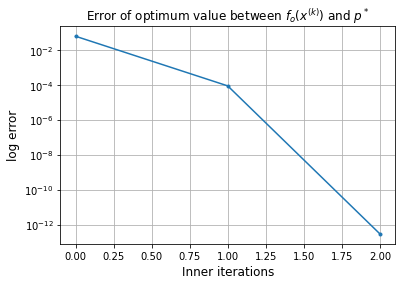

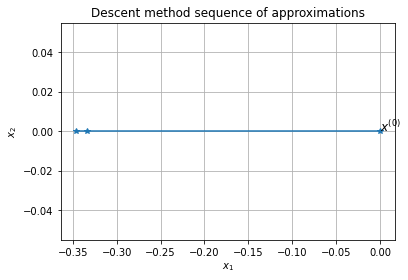

In [12]:
[x,iteration,Err_plot,x_plot] = p.solve(x_0,
                                        x_ast=x_ast,
                                        p_ast=p_ast,
                                        gf_B=gf_class,
                                        Hf_B=Hf_class
                                        )

,Iter,Normgf,Newtons decrement,Err x ast,Err p ast,line search
row0,0,9.05e-01,8.19e-01,1.00e+00,6.07e-02,---


,Iter,Normgf,Newtons decrement,Err x ast,Err p ast,line search
row1,1,2.71e-01,7.37e-02,3.05e-01,5.61e-03,5.00e-01


,Iter,Normgf,Newtons decrement,Err x ast,Err p ast,line search
row2,2,7.64e-02,5.84e-03,8.61e-02,4.46e-04,5.00e-01


,Iter,Normgf,Newtons decrement,Err x ast,Err p ast,line search
row3,3,2.14e-02,4.57e-04,2.41e-02,3.49e-05,5.00e-01


,Iter,Normgf,Newtons decrement,Err x ast,Err p ast,line search
row4,4,5.98e-03,3.57e-05,6.74e-03,2.73e-06,5.00e-01


,Iter,Normgf,Newtons decrement,Err x ast,Err p ast,line search
row5,5,1.67e-03,2.79e-06,1.88e-03,2.13e-07,5.00e-01


,Iter,Normgf,Newtons decrement,Err x ast,Err p ast,line search
row6,6,4.67e-04,2.19e-07,5.27e-04,1.67e-08,5.00e-01


,Iter,Normgf,Newtons decrement,Err x ast,Err p ast,line search
row7,7,1.31e-04,1.71e-08,1.47e-04,1.30e-09,5.00e-01


Error of x with respect to x_ast: 1.47e-04
Approximate solution: [-0.34662467  0.        ]


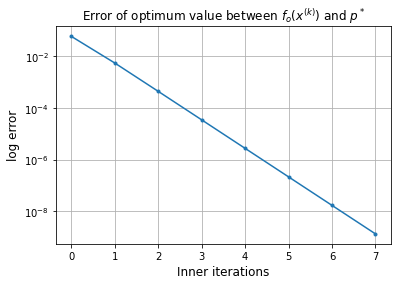

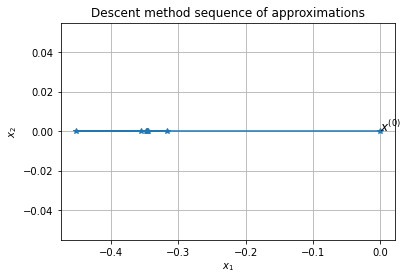

In [13]:
[x,iteration,Err_plot,x_plot] = p.solve(x_0,
                                        x_ast=x_ast,
                                        p_ast=p_ast,
                                        gf_B=gf_class,
                                        Hf_B=Hf_class,
                                        method="gradient"
                                        )

,Iter,Normgf,Newtons decrement,Err x ast,Err p ast,line search
row0,0,9.05e-01,8.19e-01,1.00e+00,6.07e-02,---


,Iter,Normgf,Newtons decrement,Err x ast,Err p ast,line search
row1,1,2.71e-01,7.37e-02,3.05e-01,5.61e-03,5.00e-01


,Iter,Normgf,Newtons decrement,Err x ast,Err p ast,line search
row2,2,7.64e-02,5.84e-03,8.61e-02,4.46e-04,5.00e-01


,Iter,Normgf,Newtons decrement,Err x ast,Err p ast,line search
row3,3,2.14e-02,4.57e-04,2.41e-02,3.49e-05,5.00e-01


,Iter,Normgf,Newtons decrement,Err x ast,Err p ast,line search
row4,4,5.98e-03,3.57e-05,6.74e-03,2.73e-06,5.00e-01


,Iter,Normgf,Newtons decrement,Err x ast,Err p ast,line search
row5,5,1.67e-03,2.79e-06,1.88e-03,2.13e-07,5.00e-01


,Iter,Normgf,Newtons decrement,Err x ast,Err p ast,line search
row6,6,4.67e-04,2.19e-07,5.27e-04,1.67e-08,5.00e-01


,Iter,Normgf,Newtons decrement,Err x ast,Err p ast,line search
row7,7,1.31e-04,1.71e-08,1.47e-04,1.30e-09,5.00e-01


Error of x with respect to x_ast: 1.47e-04
Approximate solution: [-0.34662467  0.        ]


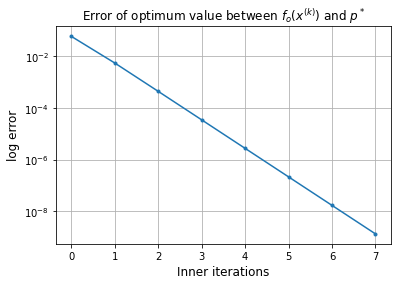

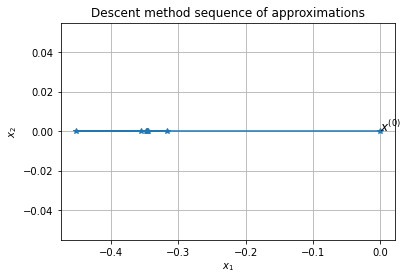

In [14]:
[x,iteration,Err_plot,x_plot] = p.solve(x_0,
                                        x_ast=x_ast,
                                        p_ast=p_ast,
                                        gf_B=gf_class,
                                        Hf_B=Hf_class,
                                        method="coordinate descent"
                                        )

## Ejemplos del método de descenso por coordenadas

### Algoritmo: Método de descenso por coordenadas

> **Dado** un **punto inicial** $x$ en $\text{dom}f_o$
>
> **Repetir** el siguiente bloque para $k=0,1,2,\dots$
>
>> 1. Obtener el índice $i$ de $\nabla f_o(x)$ con máximo valor absoluto: $\left |(\nabla f_o(x))_i \right | = ||\nabla f_o(x)||_\infty$.
>> 1. Calcular la dirección de descenso más pronunciado bajo la norma $1$: $\Delta x_{\text{sd}} = - \frac{\partial f_o(x)}{\partial x_i} e_i$ con $e_i$ $i$-ésimo vector canónico.
>> 2. Búsqueda de línea. Elegir un tamaño de paso $t > 0$.
>> 3. Hacer la actualización: $x = x + t\Delta x$.
>
> **hasta** convergencia (satisfacer criterio de paro).


## Ejemplos del método de descenso más pronunciado bajo la norma cuadrática como caso particular del método de descenso en gradiente

```{admonition} Definición

Sea $P \in \mathbb{S}^n_+$, $P^{1/2}$ se nombra **raíz cuadrada simétrica**, ***symmetric squareroot*** y se define como 

$$P^{1/2}=Qdiag(\lambda_1^{1/2},\dots,\lambda_n^{1/2})Q^T$$

con $Q$ y $diag(\lambda_1^{1/2},\dots,\lambda_n^{1/2})$ obtenidas con la **descomposición espectral** de $P$.

```

Es posible probar que el método de descenso más pronunciado bajo la norma cuadrática $||\cdot||_P$ es el método de descenso en gradiente aplicado al problema de optimización **después del cambio de coordenadas $\hat{x}=P^{1/2}x$**. En este cambio de coordenadas $x$ es la variable original por lo que si deseamos utilizar descenso en gradiente utilizamos la inversa de la matriz raíz cuadrada simétrica $P^{1/2}$ quedando la transformación como: $x = P^{-1/2}\hat{x}$.

Ejemplos

**De la nota descenso en gradiente_Python**

1) $$\min \quad (x_1-2)^2+(2-x_2)^2+x_3^2+x_4^4$$

2) El método de descenso en gradiente es **altamente sensible** a la forma de las curvas de nivel de la función objetivo $f_o$. Para observar esto considérese el problema: $$\min \frac{1}{2}\left(x_1^2+Cx_2^2 \right)$$

1) $$\min \quad e^{(x_1+3x_2-0.1)}+e^{x_1-3x_2-0.1}+e^{-x_1-0.1}$$

**Comentarios:**

* Como se observa en los ejemplos anteriores la elección de la norma en el método de descenso más pronunciado tiene un efecto fuerte en la tasa de convergencia. 

* Siempre existe una matriz $P$ para la cual el método de descenso más pronunciado tiene una convergencia buena. El reto está en encontrar tal matriz. La idea es identificar una matriz $P$ para la cual el problema transformado tenga un número de condición moderado.

**De la nota descenso por coordenadas**

1) $$\min \quad (x_1-2)^2+(2-x_2)^2+x_3^2+x_4^4$$

2) $$\min \frac{1}{2}\left(x_1^2+Cx_2^2 \right)$$

1) $$\min \quad e^{(x_1+3x_2-0.1)}+e^{x_1-3x_2-0.1}+e^{-x_1-0.1}$$

**De la nota Método Newton Python**

1) $$\min \quad e^{(x_1+3x_2-0.1)}+e^{x_1-3x_2-0.1}+e^{-x_1-0.1}$$

2) El método de Newton **es insensible** a la forma de las curvas de nivel de la función objetivo $f_o$. Para observar esto considérese el problema: 

$$\min \frac{1}{2}\left(x_1^2+Cx_2^2 \right)$$

```{admonition} Ejercicios
:class: tip

1.Resuelve los ejercicios y preguntas de la nota.
```


**Preguntas de comprehensión**


**Referencias:**

1. S. P. Boyd, L. Vandenberghe, Convex Optimization, Cambridge University Press, 2009.
